Importing libraries

In [136]:
import math
import matplotlib.pyplot as plt
import numpy as np
import csv
import os

Unit of measurement

Unit of measurement are kN, m, s.
Therefore, forces are in kN, pressures in KPa, moments in kN x m, time in seconds, distances in metres.
Angles are in 360-degree format in output.

For coordinates of points related to the centre of the circle,\
go to "Origin of coordinates in the centre of the circle"

For coordinates of points related to the left extreme of the circle,\
go to "Change of origins of coordinates\
Origin of coordinates on the left extreme of the circle"

Input section

Circle data input

In [137]:
# Input of arch attributes
rise_int = 3.45
span_length = 9.26
arch_thickness = 0.50
elements = 4

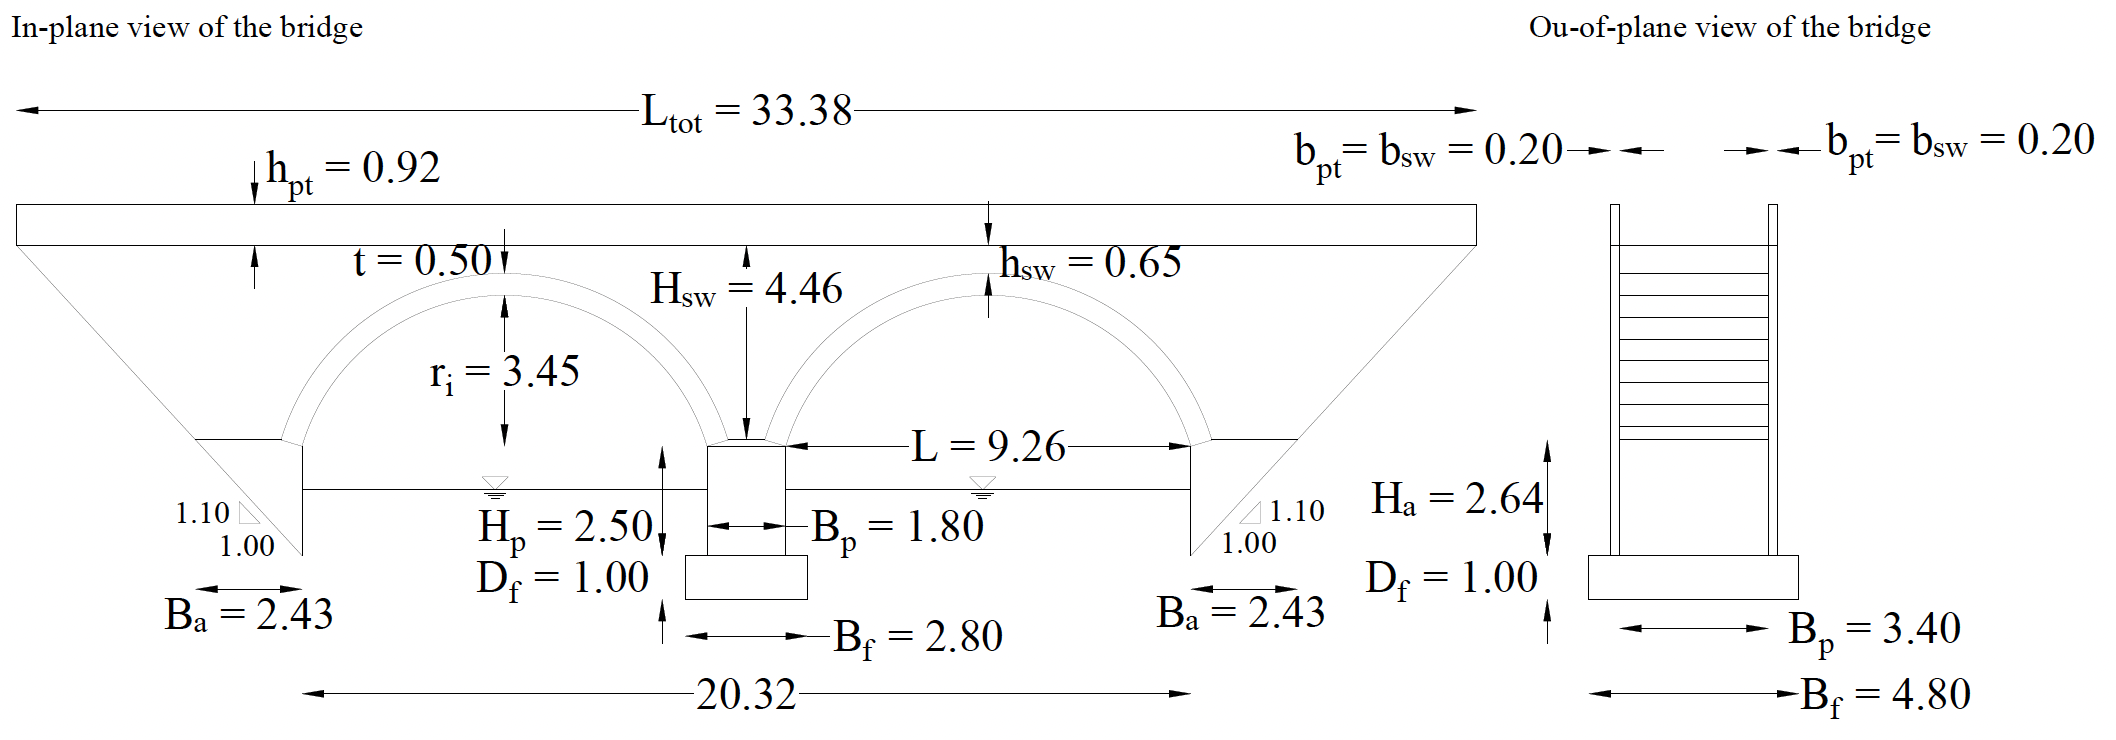

Constitutive law data input

In [138]:
young_modulus = 4.690e6
poisson_coefficient = 0.25
# Eulero-Bernoulli beam model

Failure criteria data input

In [139]:
ultimate_compression_strength = 4.690e3
ultimate_tension_strength = 4.69e2

Calculations of circle attributes

In [140]:
# Arch angle attributes
centre_angle = 4 * math.atan((2 * rise_int)/span_length)
springing_angle = (math.pi - centre_angle)/2

print("centre_angle = ", round(math.degrees(centre_angle),4))
print("springing_angle = ", round(math.degrees(springing_angle),4))

centre_angle =  146.7651
springing_angle =  16.6174


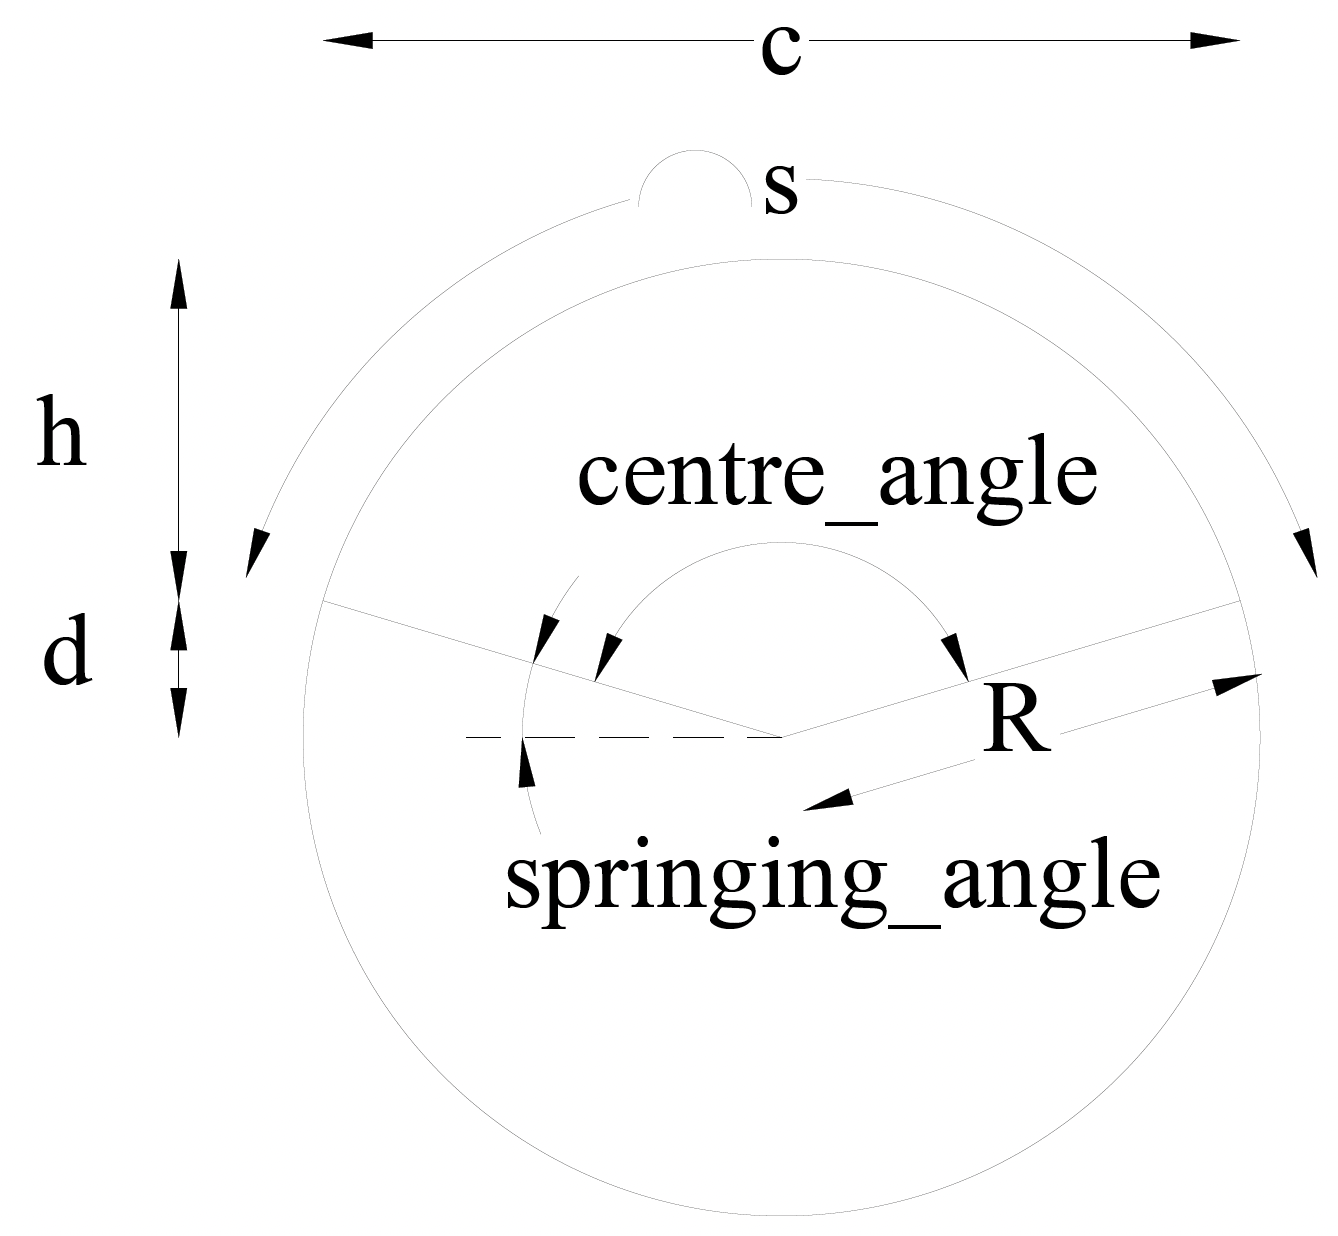

In [141]:
# Arch radius attributes
radius_int = span_length/(2*math.cos(springing_angle))
radius_centre = radius_int + arch_thickness/2
radius_ext = radius_int + arch_thickness

print("radius_int = ", round(radius_int,3))
print("radius_centre = ", round(radius_centre,3))
print("radius_ext = ", round(radius_ext,3))

radius_int =  4.832
radius_centre =  5.082
radius_ext =  5.332


In [142]:
# Arch span length attributes
span_length_centre = span_length + 2 * ((arch_thickness/2) * math.cos(springing_angle))
span_length_ext = span_length + 2 * (arch_thickness * math.cos(springing_angle))

print("span_length_centre = ", round(span_length_centre,3))
print("span_length_ext = ", round(span_length_ext,3))

span_length_centre =  9.739
span_length_ext =  10.218


In [143]:
# Arch rise attributes
rise_centre = (span_length_centre/2) * math.tan(centre_angle/4)
rise_ext = (span_length_ext/2) * math.tan(centre_angle/4)

print("rise_centre = ", round(rise_centre,3))
print("rise_ext = ", round(rise_ext,3))

rise_centre =  3.629
rise_ext =  3.807


Geometry for the structural model\
Arch centre-line

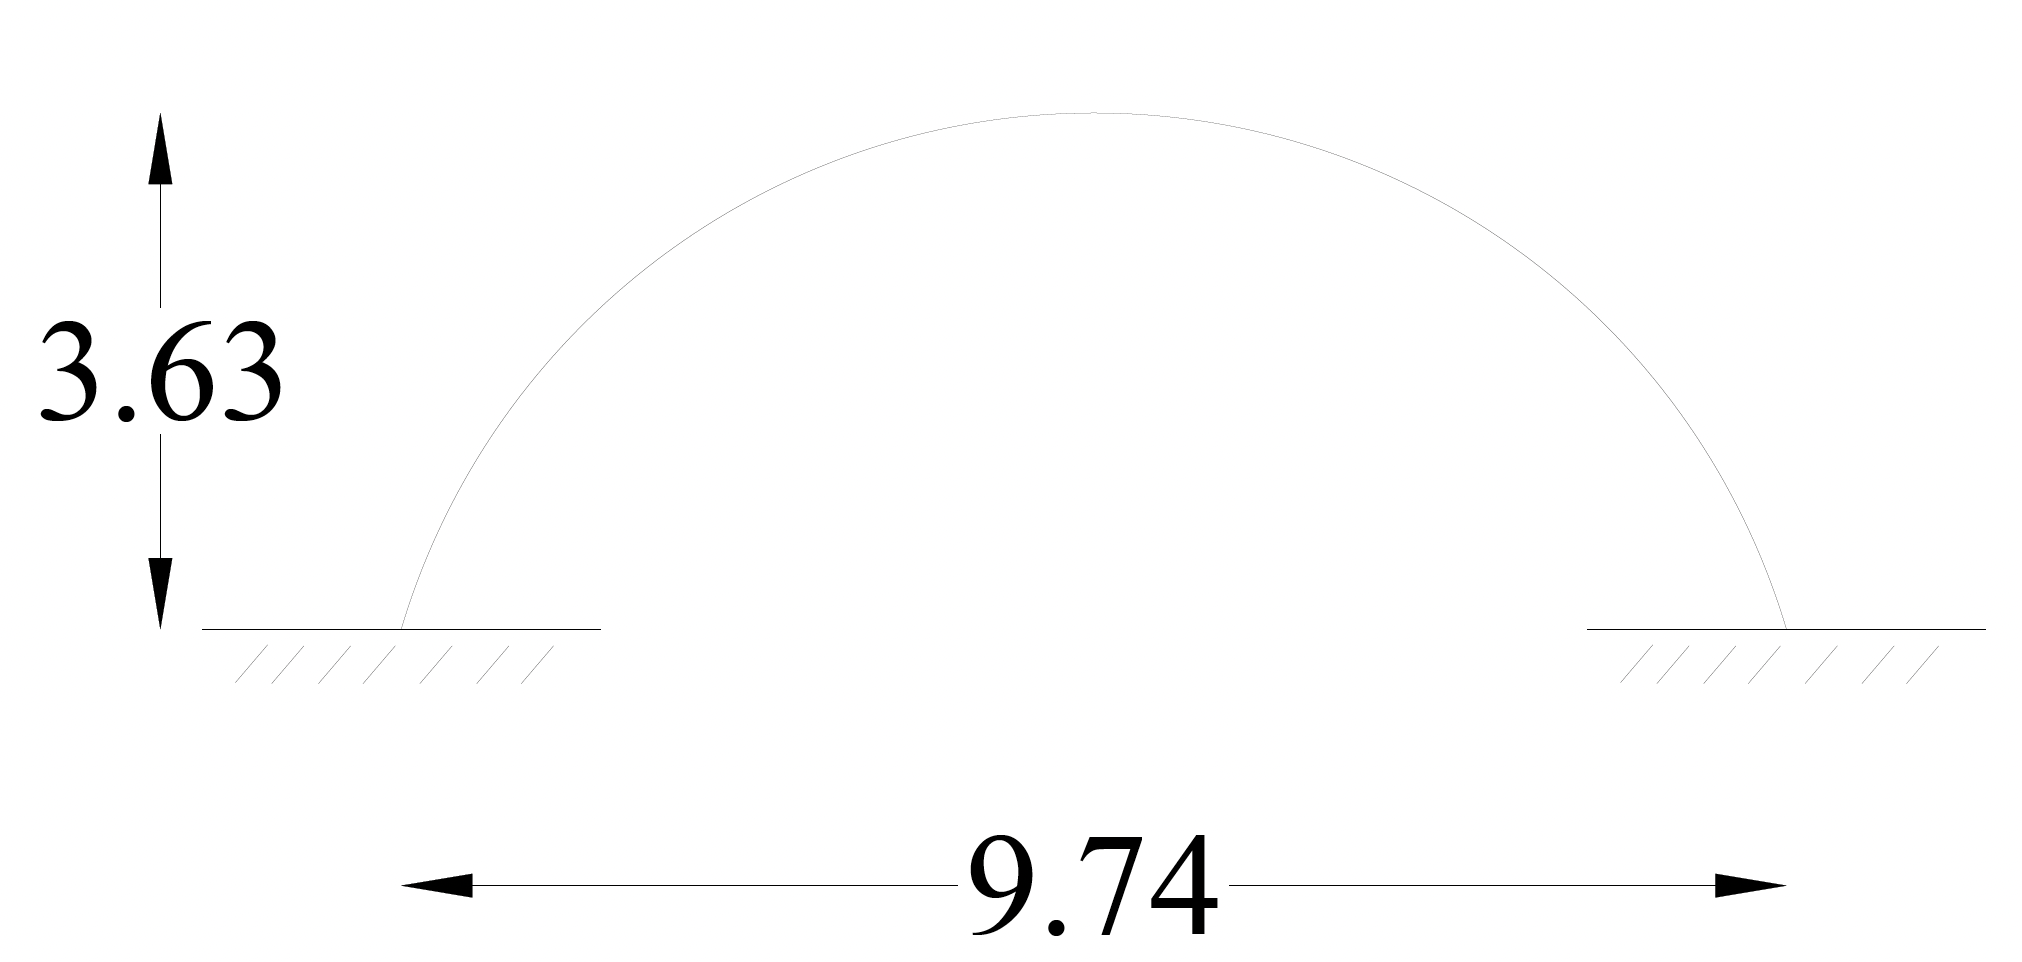

Input of load attributes

In [144]:
# Input of parapet attributes
parapet_thickness = 0.20
parapet_height = 0.92
parapet_unit_weight = 22

In [145]:
# Input of spandrel wall attributes
spandrel_wall_thickness = 0.20
spandrel_wall_arch_height = 0.65
spandrel_wall_unit_weight = 22

spandrel_wall_springing_height = spandrel_wall_arch_height + rise_ext + radius_ext * math.sin(springing_angle)

print("Spandrel wall springing height:", round(spandrel_wall_springing_height, 3))

Spandrel wall springing height: 5.982


In [146]:
# Input of arch barrell attribute
arch_barrell_width = 1.00
arch_barrell_height = arch_thickness
arch_barrell_unit_weight = 22

Point coordinates output

Origin of coordinates in the centre of the circle

In [147]:
def divide_half_circle(radius, span_length, elements):

    angle_per_point = centre_angle/elements
    coordinates = []

    for i in range(elements+1):
        current_angle = springing_angle + (i * angle_per_point)
        x_O = round(radius * math.cos(current_angle), 3)
        y_O = round(radius * math.sin(current_angle), 3)
        coordinates.append((i+1, round(math.degrees(current_angle), 4), x_O, y_O))

    for i, coordinate in enumerate(coordinates):
        print("Point ID: ", coordinate[0], "; Point angle: ", coordinate[1], "; x_O: ", coordinate[2], "; y_O: ", coordinate[3])
    
    return coordinates

Output variable

In [148]:
point_coordinates = divide_half_circle(radius_centre, span_length_centre, elements)

Point ID:  1 ; Point angle:  16.6174 ; x_O:  4.87 ; y_O:  1.453
Point ID:  2 ; Point angle:  53.3087 ; x_O:  3.036 ; y_O:  4.075
Point ID:  3 ; Point angle:  90.0 ; x_O:  0.0 ; y_O:  5.082
Point ID:  4 ; Point angle:  126.6913 ; x_O:  -3.036 ; y_O:  4.075
Point ID:  5 ; Point angle:  163.3826 ; x_O:  -4.87 ; y_O:  1.453


In [149]:
print(point_coordinates[0])

(1, 16.6174, 4.87, 1.453)


In [150]:
def plot_elements_and_half_circle(coordinates, radius, span_length):
    x_points = [coordinate[2] for coordinate in coordinates]
    y_points = [coordinate[3] for coordinate in coordinates]

    springing_angle = math.acos(span_length/(2*radius))
    theta = np.linspace(springing_angle, math.pi - springing_angle, 100)
    x_circle = radius * np.cos(theta)
    y_circle = radius * np.sin(theta)
    
    fig, ax = plt.subplots()
    ax.scatter(x_points, y_points, color = 'red')
    ax.plot(x_circle, y_circle, color = 'blue')
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.show()

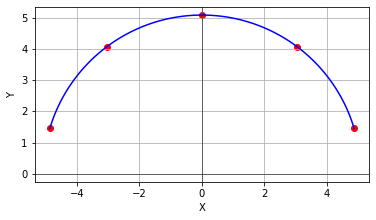

In [151]:
plots = plot_elements_and_half_circle(point_coordinates, radius_centre, span_length_centre)

In [152]:
def export_to_csv(coordinates, filename):
    headers = ['Point ID', 'Point angle', 'X', 'Y']

    current_dir = os.getcwd()
    filepath = os.path.join(current_dir, filename)

    with open(filepath, 'w', newline = '') as file:
        writer = csv.writer(file)
        writer.writerow(headers)
        writer.writerows(coordinates)

    print(f"Data has been exported to {filepath} successfully.")

In [153]:
filename = 'circle_points_coordinates.csv'
export_to_csv(point_coordinates, filename)

Data has been exported to /Users/fn20944/Library/CloudStorage/OneDrive-UniversityofBristol/YEAR 3_2022-23/RESOURCES FOR FRAGILITY CURVE FRAMEWORK/PROGRAMMING CODES/arch_compression/AFTER THE IALCEE PAPER/circle_points_coordinates.csv successfully.


Change of origins of coordinates\
Origin of coordinates on the left extreme of the circle

In [154]:
def divide_half_circle(radius, span_length, elements):

    angle_per_point = centre_angle/elements
    coordinates = []

    for i in range(elements+1):
        current_angle = springing_angle + (i * angle_per_point)
        x_O = round(radius * math.cos(springing_angle) - radius * math.cos(current_angle),3)
        y_O = round(radius * math.sin(current_angle), 3)
        coordinates.append((i+1, round(math.degrees(current_angle), 4), x_O, y_O))

    for i, coordinate in enumerate(coordinates):
        print("Point ID: ", coordinate[0], "; Point angle: ", coordinate[1], "; x_O: ", coordinate[2], "; y_O: ", coordinate[3])
    
    return coordinates

In [155]:
def plot_elements_and_half_circle(coordinates, radius, span_length):
    x_points = [coordinate[2] for coordinate in coordinates]
    y_points = [coordinate[3] for coordinate in coordinates]

    springing_angle = math.acos(span_length/(2*radius))
    theta = np.linspace(springing_angle, math.pi - springing_angle, 100)
    x_circle = radius * np.cos(theta)
    y_circle = radius * np.sin(theta)
    
    fig, ax = plt.subplots()
    ax.scatter(x_points, y_points, color = 'red')
    ax.plot(x_circle, y_circle, color = 'blue')
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.axhline(radius * math.sin(springing_angle), color='black', linewidth=1)
    ax.axvline(-radius * math.cos(springing_angle), color='black', linewidth=1)
    plt.grid(True)
    plt.show()

In [156]:
def export_to_csv(coordinates, filename):
    headers = ['Point ID', 'Point angle', 'X', 'Y']

    current_dir = os.getcwd()
    filepath = os.path.join(current_dir, filename)

    with open(filepath, 'w', newline = '') as file:
        writer = csv.writer(file)
        writer.writerow(headers)
        writer.writerows(coordinates)

    print(f"Data has been exported to {filepath} successfully.")

In [157]:
point_coordinates_prime = divide_half_circle(radius_centre, span_length_centre, elements)

Point ID:  1 ; Point angle:  16.6174 ; x_O:  0.0 ; y_O:  1.453
Point ID:  2 ; Point angle:  53.3087 ; x_O:  1.833 ; y_O:  4.075
Point ID:  3 ; Point angle:  90.0 ; x_O:  4.87 ; y_O:  5.082
Point ID:  4 ; Point angle:  126.6913 ; x_O:  7.906 ; y_O:  4.075
Point ID:  5 ; Point angle:  163.3826 ; x_O:  9.739 ; y_O:  1.453


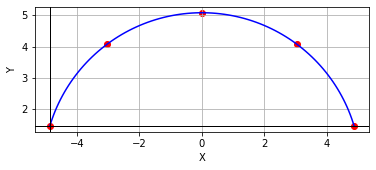

In [158]:
plots = plot_elements_and_half_circle(point_coordinates, radius_centre, span_length_centre)

In [159]:
filename = 'circle_points_coordinates_left_origin.csv'
export_to_csv(point_coordinates_prime, filename)

Data has been exported to /Users/fn20944/Library/CloudStorage/OneDrive-UniversityofBristol/YEAR 3_2022-23/RESOURCES FOR FRAGILITY CURVE FRAMEWORK/PROGRAMMING CODES/arch_compression/AFTER THE IALCEE PAPER/circle_points_coordinates_left_origin.csv successfully.


Functions of loads

Uniform load function

In [160]:
# def uniform_load(x, y, thickness, height, unit_weight):
#     load = thickness * height * unit_weight
#     return load

# def assign_uniform_load(coordinates):
#     for i, coordinate in enumerate(coordinates):
#         x = coordinates[2]
#         y = coordinates[3]
#         parapet_load = round(uniform_load(x, y, parapet_thickness, parapet_height, parapet_unit_weight), 3)
#         self_weight_load = round(uniform_load(x, y, arch_barrell_width, arch_barrell_height, arch_barrell_unit_weight), 3) 
#         coordinates[i] = coordinate + (parapet_load,) + (self_weight_load,)

#     for i, coordinate in enumerate(coordinates):
#         print("Point ID: ", coordinate[0], "; Point angle: ", coordinate[1], "; x_O_prime: ", round(coordinate[2],3), "; y_O_prime: ", round(coordinate[3],3), 
#               "; Parapet load: ", round(parapet_load,3), "; Arch weight: ", round(self_weight_load,3))

In [161]:
# assign_uniform_load(point_coordinates_prime)

Circular load function

In [162]:
# points_x=[]
# points_y=[]

# for i, coordinate in enumerate(point_coordinates_prime):
#     points_x.append(point_coordinates_prime[i][2])
#     points_y.append(point_coordinates_prime[i][3])
#     print(points_x)
#     print(points_y)

In [163]:
# def circular_load(x, y, thickness, height, unit_weight):
    
#     y_arr = np.array(y)
#     print(y_arr)
    
#     height_arr = height
#     print(height_arr)
    
#     load_height = height_arr - y_arr
#     load = thickness * load_height * unit_weight
#     print(load)
 
#     return load

In [164]:
# spandrel_wall_load = circular_load(points_x, points_y, spandrel_wall_thickness, spandrel_wall_springing_height, spandrel_wall_unit_weight)

In [165]:
# def assign_load(coordinates):
#     for i, coordinate in enumerate(coordinates):
#         x = coordinates[2]
#         y = coordinates[3]
#         parapet_load = round(uniform_load(x, y, parapet_thickness, parapet_height, parapet_unit_weight), 3)
#         self_weight_load = round(uniform_load(x, y, arch_barrell_width, arch_barrell_height, arch_barrell_unit_weight), 3)
#         spandrel_wall_load = circular_load(points_x, points_y, spandrel_wall_thickness, spandrel_wall_springing_height, spandrel_wall_unit_weight)
#         coordinates[i] = coordinate + (parapet_load,) + (self_weight_load,) + (spandrel_wall_load,)

#     for i, coordinate in enumerate(coordinates):
#         print("Point ID: ", coordinate[0], "; Point angle: ", coordinate[1], "; x_O_prime: ", round(coordinate[2],3), "; y_O_prime: ", round(coordinate[3],3), 
#               "; Parapet load: ", round(parapet_load,3), "; Arch weight: ", round(self_weight_load,3), 
#               "; Spandrel wall", spandrel_wall_load[i])

In [166]:
# assign_load(point_coordinates_prime)

In [167]:
# def export_to_csv(coordinates, filename):
#     headers = ['Point ID', 'Point angle', 'X', 'Y', 'Parapet load', 'Arch self weight', 'Spandrel wall']

#     current_dir = os.getcwd()
#     filepath = os.path.join(current_dir, filename)

#     with open(filepath, 'w', newline = '') as file:
#         writer = csv.writer(file)
#         writer.writerow(headers)
#         writer.writerows(coordinates)

#     print(f"Data has been exported to {filepath} successfully.")

In [168]:
# filename = 'circle_points_coordinates_left_origin_loads.csv'
# export_to_csv(point_coordinates_prime, filename)

Calculation of nodal loads

In [169]:
def uniform_load(x, y, thickness, height, unit_weight):
    load = thickness * height * unit_weight
    return load

def calculate_function_value(x, y, thickness, height, unit_weight, distance):
    load = uniform_load(x, y, thickness, height, unit_weight)
    function_value = load * (distance / 2)
    return function_value

def assign_function_value(coordinates, thickness, height, unit_weight):
    for i, coordinate in enumerate(coordinates):
        x = coordinate[2]
        y = coordinate[3]
        distance = 0  # Initialize distance to 0 for the first point
        if i > 0:
            # Calculate the distance between the current point and the previous point
            distance = abs(coordinates[i][2] - coordinates[i-1][2])
        function_value = calculate_function_value(x, y, thickness, height, unit_weight, distance)
        coordinates[i] = coordinate + (function_value, )

    for i, coordinate in enumerate(coordinates):
        print("Point ID: ", coordinate[0], "; Point angle: ", coordinate[1], "; X: ", coordinate[2], "; Y: ", coordinate[3], 
              "; Function value: ", coordinate[4])

# Example usage:
assign_function_value(point_coordinates_prime, parapet_thickness, parapet_height, parapet_unit_weight)


Point ID:  1 ; Point angle:  16.6174 ; X:  0.0 ; Y:  1.453 ; Function value:  0.0
Point ID:  2 ; Point angle:  53.3087 ; X:  1.833 ; Y:  4.075 ; Function value:  3.7099920000000006
Point ID:  3 ; Point angle:  90.0 ; X:  4.87 ; Y:  5.082 ; Function value:  6.1468880000000015
Point ID:  4 ; Point angle:  126.6913 ; X:  7.906 ; Y:  4.075 ; Function value:  6.144864000000001
Point ID:  5 ; Point angle:  163.3826 ; X:  9.739 ; Y:  1.453 ; Function value:  3.709992000000003
